# <font color=blue>#QuarentenaDados - 1st day </font>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Reading [MovieLens](https://grouplens.org/datasets/movielens/) data

In [2]:
movies = pd.read_csv('../Files/movies.csv')
movies_ratings = pd.read_csv('../Files/ratings.csv')

In [3]:
average_ratings = movies_ratings.groupby('movieId')['rating'].mean()
movies = movies.join(average_ratings, on='movieId')

## Challenge 1 by [Paulo Silveira](https://twitter.com/paulo_caelum)

Determine how many films have not been rated and which films are.

In [4]:
no_rating_movies = movies[movies['rating'].isna()]['title'].values
print(no_rating_movies)
print('\n')
print("Number of movies whithout ratings: ", len(no_rating_movies))

['Innocents, The (1961)' 'Niagara (1953)' 'For All Mankind (1989)'
 'Color of Paradise, The (Rang-e khoda) (1999)'
 "I Know Where I'm Going! (1945)" 'Chosen, The (1981)'
 'Road Home, The (Wo de fu qin mu qin) (1999)' 'Scrooge (1970)'
 'Proof (1991)' 'Parallax View, The (1974)' 'This Gun for Hire (1942)'
 'Roaring Twenties, The (1939)' 'Mutiny on the Bounty (1962)'
 'In the Realms of the Unreal (2004)' 'Twentieth Century (1934)'
 'Call Northside 777 (1948)' 'Browning Version, The (1951)'
 'Chalet Girl (2011)']


Number of movies whithout ratings:  18


## Challenge 2 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Rename the column where the average ratings for each film are to average_rating.

In [5]:
movies = movies.rename(columns={'rating': 'average_rating'})
movies.head()

,movieId,title,genres,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Challenge 3 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Put the number of ratings per film, that is, not only the average but the TOTAL votes per film.

In [6]:
number_of_ratings = movies_ratings.groupby('movieId')['rating'].count()
movies = movies.join(number_of_ratings, on='movieId')

In [7]:
movies = movies.rename(columns={'rating': 'number_of_ratings'})
movies.head()

,movieId,title,genres,average_rating,number_of_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Challenge 4 by  [Thiago Gonçalves](https://twitter.com/tgcsantos)

Round off averages (average grade column) to two decimal places.

In [8]:
movies['average_rating'] = movies['average_rating'].round(2)
movies.head()

,movieId,title,genres,average_rating,number_of_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Challenge 5 by [Allan Spadini](https://twitter.com/allanspadini)

Discover the genres of the films (which ones are unique). (this one takes it)

In [9]:
genres = []

for movie in movies['genres']:
    movie = movie.split('|')
    for genre in movie:
        genres.append(genre)

movies_genres = set(genres)

## Challenge 6 by [Thais André](https://twitter.com/thais_tandre)

Count the number of appearances of each genre.

In [10]:
num_genres = {}
for genre in movies_genres:
    num_genres[genre] = genres.count(genre)
    print(genre, genres.count(genre))

Documentary 440
Fantasy 779
Film-Noir 87
IMAX 158
War 382
Drama 4361
Children 664
Crime 1199
Western 167
Comedy 3756
Adventure 1263
Animation 611
(no genres listed) 34
Thriller 1894
Musical 334
Sci-Fi 980
Horror 978
Romance 1596
Action 1828
Mystery 573


## Challenge 7 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)


Plot the appearance chart for each genre. It can be a bar type chart.

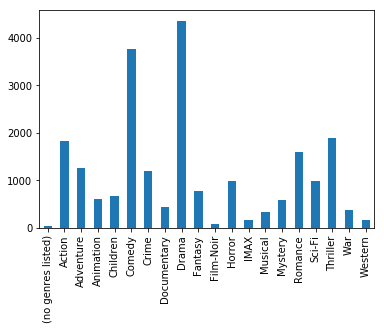

In [11]:
idx = np.arange(0,1)
df = pd.DataFrame(num_genres, idx).T
df.plot(kind='bar', legend=False)
plt.show()